<a href="https://colab.research.google.com/github/anupa-aa/ML-AI-Courswork-Module/blob/master/Anupa_Adikary_ex3_GLMs_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**. Let's work on a real world dataset. The features contain information like weekday or not, weather situation(e.g., temperature, humidity, etc.) The target variable is the count of bike rentals (if you are curious about this dataset, you can read https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset, though the dataset descriptions are not needed in completing this exercise). Our goal is to predict the count of bike rental.

**Dataset download:** You can get data from: https://drive.google.com/file/d/1OVUZ9hEag6OjPD3gv8zfEtY-rD_pv7yg/view?usp=sharing and then copy it to your own google drive.

1. what are the special things you observe about the target variable? what do you think is a reasonable distribution to model the target variable? what is the likelihood function based on your probability assumption?

Hint: think about what kind of distribution is used to model count data.

The training target y is continuous integers (count data) so we use poisson distribution


2. by MLE, derive the loss function and write the derivation in latex in this notebook. Hint: parameterize the conditional mean as $E[Y|x] = \lambda(x;w) = e^{x^\top w}$.

3. Compute the gradient of this objective function $\max_w \frac{1}{n} \sum_{i=1}^n (y_i x_i^\top w - e^{x_i^\top w})$.


Hint: try to compute the gradient of a single data point, then you can sum over all data and scaled it by $1/n$. The summation can be done without using for loop.  

4. Optimizing the above objective function by gradient descent. The goal is to make reasonable predictions of bike rentals. Part of the code is already given.

In [ ]:
# The original dataset is large, below I provide a cleaned subset.
# load the cleaned subset of bikeshare data, it is already a numpy matrix
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

# you can get data from: https://drive.google.com/file/d/1OVUZ9hEag6OjPD3gv8zfEtY-rD_pv7yg/view?usp=sharing
# and then copy it to your own google drive

# grab data from google drive
drive.mount('/content/drive')
# the first argument is the location of your file, in my google drive,
# I put the dataset under the directory cwm-python-aiml
X = np.loadtxt('/content/drive/MyDrive/cwm-python-aiml/subsetbikeshare.txt', delimiter=',')
print(X.shape)
np.random.shuffle(X)
# I already put the target variable the last column
Y = X[:, -1]
X = X[:, :-1]
X = np.hstack((X, np.ones((X.shape[0], 1))))

Mounted at /content/drive
(5000, 115)


In [ ]:
valn = int(0.1*X.shape[0])
Yval = Y[:valn]
Xval = X[:valn]

X=X[valn:]
Y=Y[valn:]

print(Y[:10])

# TODO: complete the code below to compute gradient
def grad(w):

  return 1./X.shape[0] *np.squeeze(Y.reshape((1,-1)).dot(X) - np.sum(X*np.exp(X.dot(w)).reshape((-1,1)), axis=0, keepdims=True))
  #return 1/(1-valn)*np.sum((np.matmul(Y,X.T) - np.matmul(np.matmul(X.T, np.exp((np.matmul(X.T, w)))))))


w = np.zeros(X.shape[1])
for i in range(3000):
  w = w + 0.0001 * grad(w)
  if i%100==0:
    print(' validation err is :: ', np.sqrt(np.mean(np.square(Xval.dot(w)-Yval))))
    print(' train err is :: ', np.sqrt(np.mean(np.square(X.dot(w)-Y))))



[432. 118.   6.  99. 104.  26. 227. 281. 343.  45.]
 validation err is ::  261.6548951964376
 train err is ::  259.225951377515
 validation err is ::  257.91161963951515
 train err is ::  255.46047767569897
 validation err is ::  257.83385087179016
 train err is ::  255.38086979752038
 validation err is ::  257.79935395367704
 train err is ::  255.34566854211647
 validation err is ::  257.78000142240404
 train err is ::  255.32599870978135
 validation err is ::  257.7676612310425
 train err is ::  255.31343782543524
 validation err is ::  257.75903076139593
 train err is ::  255.3045872240959
 validation err is ::  257.7525845017816
 train err is ::  255.29789570805502
 validation err is ::  257.74754185521306
 train err is ::  255.2925796450981
 validation err is ::  257.7434668942951
 train err is ::  255.28820660119072
 validation err is ::  257.74009705443996
 train err is ::  255.28451904291182
 validation err is ::  257.73726349028556
 train err is ::  255.28135324775954
 validat

5. Implement the algorithm by optimizing the above objective function in tensorflow. The goal is to make reasonable predictions of bike rentals. (Code is given, try to understand it, and do the next question.)

In [ ]:
# The original dataset is large, below I provide a cleaned subset.
# load the cleaned subset of bikeshare data, it is already a numpy matrix
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

# you can get data from: https://drive.google.com/file/d/1OVUZ9hEag6OjPD3gv8zfEtY-rD_pv7yg/view?usp=sharing
# and then copy it to your own google drive

# grab data from google drive
drive.mount('/content/drive')
# the first argument is the location of your file, in my google drive,
# I put the dataset under the directory cwm-python-aiml
X = np.loadtxt('/content/drive/MyDrive/cwm-python-aiml/subsetbikeshare.txt', delimiter=',')
print(X.shape)
# I already put the target variable the last column
Y = X[:, -1]
X = X[:, :-1]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(5000, 115)


In [ ]:
# init an empty model
poisson_model = tf.keras.models.Sequential()
# add input layer
poisson_model.add(tf.keras.Input(shape=(114)))
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
poisson_model.add(tf.keras.layers.Dense(units=1,
                                        kernel_regularizer=tf.keras.regularizers.L2(1e-2),
                                        activation=tf.exp))
# for adding regularizers, see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer

# take a look the summary of the model
poisson_model.summary()

# reduce mean function returns the mean of the input vector
def loss_fn(y_true, y_pred):
  return -tf.reduce_mean(y_true * tf.squeeze(tf.math.log(y_pred)) - y_pred)

modelmetric = tf.keras.metrics.RootMeanSquaredError()

# regarding compile function, https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
poisson_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=loss_fn,
        metrics=[modelmetric])

# fit the poisson model, https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
# batch_size is the number of samples used to compute gradient
history = poisson_model.fit(X, Y, epochs=100, batch_size=64,
                  verbose=0,
                  # Calculate validation results on 20% of the training data.
                  # you can also feed your own validation set by setting validation_data=...
                  validation_split = 0.2)

print(history.history)
print([key for key in history.history])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 115       
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________
{'loss': [52.849876403808594, 40.25847244262695, 27.785017013549805, 14.819169998168945, 1.8391211032867432, -10.67553424835205, -23.302330017089844, -36.26565170288086, -48.8560905456543, -61.32266616821289, -74.35940551757812, -86.99978637695312, -99.5905990600586, -112.42830657958984, -124.70572662353516, -137.78038024902344, -150.1486053466797, -162.80015563964844, -175.43992614746094, -187.86972045898438, -200.50389099121094, -212.99937438964844, -225.40345764160156, -238.23521423339844, -250.51016235351562, -262.864990234375, -275.37432861328125, -287.4944763183594, -300.05

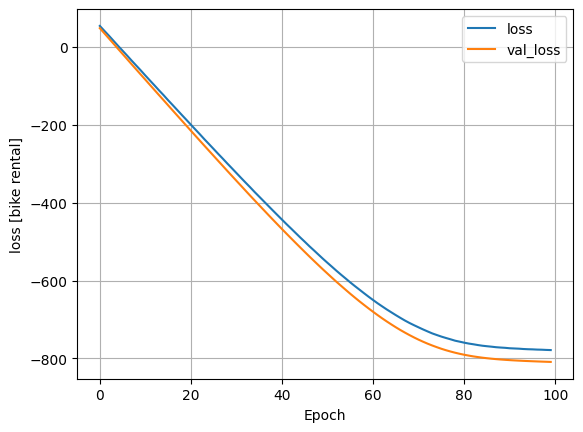

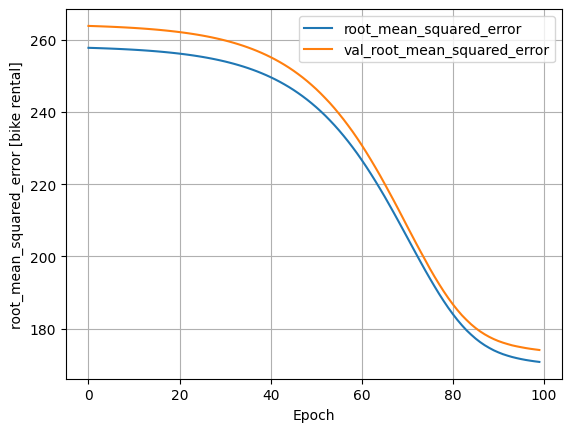

In [ ]:
# visualize the training progress
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10000])
  plt.xlabel('Epoch')
  plt.ylabel('loss [bike rental]')
  plt.legend()
  plt.grid(True)

plt.figure()
plot_loss(history)


def plot_err(history):
  plt.plot(history.history[modelmetric.name], label=modelmetric.name)
  plt.plot(history.history['val_'+modelmetric.name], label='val_'+modelmetric.name)
  # plt.ylim([0, 10000])
  plt.xlabel('Epoch')
  plt.ylabel(modelmetric.name +' [bike rental]')
  plt.legend()
  plt.grid(True)

plt.figure()
plot_err(history)

# https://www.tensorflow.org/tutorials/keras/regression has more examples
# for building regression models

**Question 2**. implement linear regression in tensorflow. You only need to add/modify code in two places below as indicated by TODO.

(5000, 114)
{'loss': [nan, nan, nan, nan, -153.5771942138672, -175.78768920898438, -193.84912109375, -210.1534881591797, -225.0006561279297, -238.47991943359375, -251.158447265625, -262.7147521972656, -273.4992980957031, -283.67303466796875, -293.4122314453125, -302.3638000488281, -311.108642578125, -319.16156005859375, -327.0341491699219, -334.6283264160156, -341.7297668457031, -348.50616455078125, -355.2279052734375, -361.5525207519531, -367.79254150390625, -373.8915100097656, -379.6625061035156, -385.1772766113281, -390.68511962890625, -395.975341796875, -401.03125, -406.2322692871094, -411.1452331542969, -415.834228515625, -420.4792785644531, -425.0873718261719, -429.5398254394531, -433.8854675292969, -438.2601318359375, -442.3836364746094, -446.6072692871094, -450.5128479003906, -454.3758850097656, -458.4232177734375, -462.1441955566406, -465.9008483886719, -469.6083984375, -473.33502197265625, -476.8377990722656, -480.36065673828125, -483.9512634277344, -487.1685485839844, -490.7

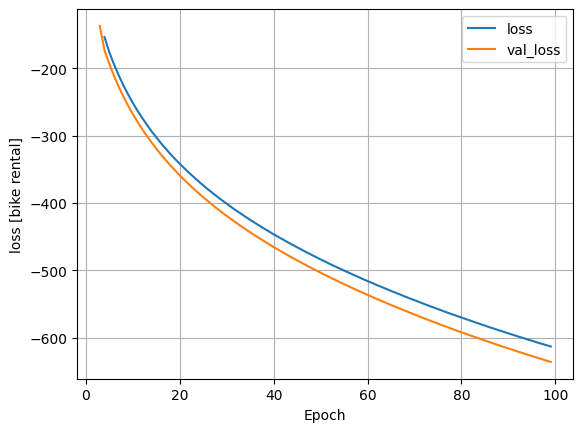

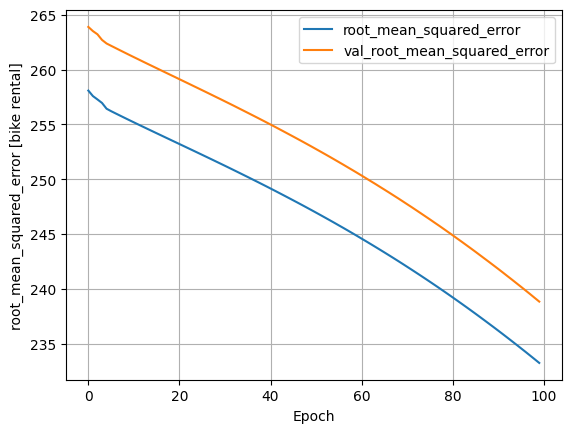

In [ ]:
print(X.shape)
# init an empty model
lr_model = tf.keras.models.Sequential()
# add input layer
lr_model.add(tf.keras.Input(shape=(114)))
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

# TODO: modify the activation here
lr_model.add(tf.keras.layers.Dense(units=1,
                                        kernel_regularizer=tf.keras.regularizers.L2(1e-2),
                                        activation=None))

# TODO:
def loss_fn(y_true, y_pred):

  return -tf.reduce_mean(y_true * tf.squeeze(tf.math.log(y_pred)) - y_pred)

modelmetric = tf.keras.metrics.RootMeanSquaredError()

lr_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss=loss_fn,
        metrics=[modelmetric])

history = lr_model.fit(X, Y, epochs=100, batch_size=64,
                  verbose=0,
                  validation_split = 0.2)

print(history.history)
print([key for key in history.history])

# visualize the training progress
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10000])
  plt.xlabel('Epoch')
  plt.ylabel('loss [bike rental]')
  plt.legend()
  plt.grid(True)

plt.figure()
plot_loss(history)


def plot_err(history):
  plt.plot(history.history[modelmetric.name], label=modelmetric.name)
  plt.plot(history.history['val_'+modelmetric.name], label='val_'+modelmetric.name)
  # plt.ylim([0, 10000])
  plt.xlabel('Epoch')
  plt.ylabel(modelmetric.name +' [bike rental]')
  plt.legend()
  plt.grid(True)

plt.figure()
plot_err(history)

**Question 3(bonus) Two subquestions**. `

1. Modeling multiclass data. Logistic regression we learned above is good for binary class. What if we have $m>2$ classes? We will assume multinomial distribution. You will finally get the very popular softmax cross entropy loss. A vector is a column vector unless otherwise specified.

Derive the loss for **Multiclass classification problems.**

To deal with multiclass classification problem, it is common to assume $p(y|x)$ is multinomial distribution (some places call categorical distribution as it is a special case of multinomial distribution), and apply MLE. Given a sample $x, y$, we can write (a slight notation abuse: $y_i \in \{0,1\}$ here means the ith component in the one-hot vector y which is m-dimensional). The conditional distribution of a data point $x, y$ is:
\begin{align}
p(y|x) &= \frac{1}{y_1 ! ... y_m !} p(y_1=1|x)^{y_1}...p(y_m=1|x)^{y_m}
\end{align}
We can parameterize those $m$ probabilities by a softmax function: $softmax(x^\top W), W \in \mathbb{R}^{d\times m}$. The softmax function is defined as: $\sigma :\mathbb {R} ^{m}\to (0,1)^{m}, $
$\sigma (\mathbf {z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{m}e^{z_{j}}}}\ \ {\text{ for }}i=1,\dotsc ,m{\text{ and }}\mathbf {z} =(z_{1},\dotsc ,z_{m})\in \mathbb {R} ^{m}.$

1. __Based on the above hints, please complete the derivation here. Now you need to compute the log likelihood of $n$ data points.__


Finally, we arrive the following loss function:
$
\min_w \frac{1}{n} \sum_{i=1}^n \log(\mathbf{1}^\top \exp{x^{(i) \top} W}) - x^{(i)\top} W y^{(i)}
$  
where I use superscripe to denote the $i$th training example.

2. You may also see a loss function for multiclassification looks like $-\frac{1}{n} \sum_{i=1}^n y^{(i)\top} \log(softmax(x^{(i) \top} W))$. Is it equivalent to the above loss function? Please prove your answer.

**Question 4 (optional).** Do a linear multiclass classification on a cloth dataset. Print out the training and testing error respectively. You only need to add oneline code as indicated by TODO.

2.12.0
4422102/4422102 [==============================] - 0s 0us/step


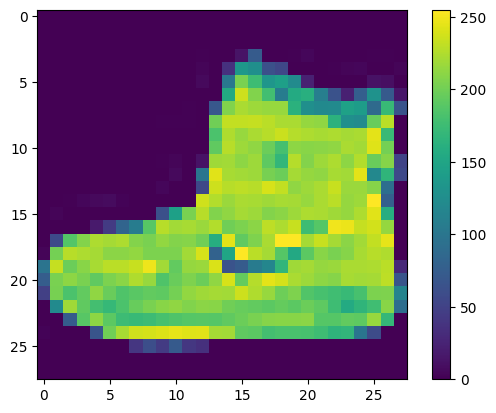

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    ## TODO: add one line here for output, you need to check out below loss function
    #tf.keras.layers.Dense(1, activation = 'sigmoid'),
    #tf.keras.layers.Dense(10, activation='softmax')
    tf.keras.layers.Dense(10,activation="sigmoid" ),
    #tf.keras.layers.Dense(10,activation="relu" ),
    #tf.keras.layers.Dense(10,activation="relu" ),
    tf.keras.layers.Dense(10, activation='softmax')
    # WE ADD SOFTMAX LAYER TO TURN INTO PROBABILITIES, WE USE 10 FOR 10 CLASSES

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # check what from_logits means
              metrics=['accuracy'])

# complete the rest of code
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1884 - accuracy: 0.6479
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6339 - accuracy: 0.7970
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4848 - accuracy: 0.8382
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4431 - accuracy: 0.8476
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4225 - accuracy: 0.8531
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4081 - accuracy: 0.8577
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8615
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3899 - accuracy: 0.8650
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3832 - accuracy: 0.8658
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4249 

**Question 5 bonus**

Based on your understanding of MLE, develop a binary classifier that models the positive class as:

$
p(y=1|x,w)=\frac{1}{2}(1 + \frac{w^\top x}{\sqrt{1+(w^\top x)^2}})
$

You need to write the log-likelihood function and compute the gradient and Hessian matrix of it.

In [ ]:
import numpy as np

def GD_using_hess(X, y, learning_rate=1.0, num_iterations=10):
    # Initialize the weights
    num_features = X.shape[1]
    w = np.zeros(num_features)

    for i in range(num_iterations):
        # Compute the positive class probability
        pos_prob = 0.5 * (1 + np.dot(X, w) / np.sqrt(1 + np.dot(X, w)**2))

        # Compute the gradient of the log-likelihood function
        gradient = np.dot(X.T, (y / pos_prob - (1 - y) / (1 - pos_prob)))

        # Compute the Hessian matrix
        hessian = np.zeros((num_features, num_features))
        for j in range(X.shape[0]):
            prob = pos_prob[j]
            x = X[j, :]
            hessian += (prob * (1 - prob)) * np.outer(x, x) / (1 + np.dot(w, x)**2)**1.5

        # Update the weights using Newton's method
        w += learning_rate * np.linalg.inv(hessian) @ gradient

    return w
